**POLYNOMIAL REGRESSION**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error

from joblib import dump, load

In [2]:
#Read in the data
df = pd.read_csv('Advertising.csv')

In [3]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
df.shape

(200, 4)

In [5]:
# seperate features and label

X = df.drop('sales', axis=1)
y = df['sales']

In [6]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [7]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [8]:
# obtain the polyfeature of X

poly_converter = PolynomialFeatures(degree=2, include_bias=False)

In [9]:
poly_converter

PolynomialFeatures(include_bias=False)

In [10]:
# fit to the X features
X_poly_feat = poly_converter.fit_transform(X)

In [11]:
X_poly_feat

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [12]:
X_poly_feat.shape

(200, 9)

In [13]:
# create the train test split
X_train, X_test,y_train, y_test = train_test_split(X_poly_feat, y, test_size=0.3, random_state=101)

In [14]:
X_train

array([[1.93200e+02, 1.84000e+01, 6.57000e+01, ..., 3.38560e+02,
        1.20888e+03, 4.31649e+03],
       [2.87600e+02, 4.30000e+01, 7.18000e+01, ..., 1.84900e+03,
        3.08740e+03, 5.15524e+03],
       [8.02000e+01, 0.00000e+00, 9.20000e+00, ..., 0.00000e+00,
        0.00000e+00, 8.46400e+01],
       ...,
       [2.39800e+02, 4.10000e+00, 3.69000e+01, ..., 1.68100e+01,
        1.51290e+02, 1.36161e+03],
       [2.14700e+02, 2.40000e+01, 4.00000e+00, ..., 5.76000e+02,
        9.60000e+01, 1.60000e+01],
       [1.63300e+02, 3.16000e+01, 5.29000e+01, ..., 9.98560e+02,
        1.67164e+03, 2.79841e+03]])

In [15]:
X_test

array([[7.470000e+01, 4.940000e+01, 4.570000e+01, 5.580090e+03,
        3.690180e+03, 3.413790e+03, 2.440360e+03, 2.257580e+03,
        2.088490e+03],
       [2.554000e+02, 2.690000e+01, 5.500000e+00, 6.522916e+04,
        6.870260e+03, 1.404700e+03, 7.236100e+02, 1.479500e+02,
        3.025000e+01],
       [1.129000e+02, 1.740000e+01, 3.860000e+01, 1.274641e+04,
        1.964460e+03, 4.357940e+03, 3.027600e+02, 6.716400e+02,
        1.489960e+03],
       [1.098000e+02, 4.780000e+01, 5.140000e+01, 1.205604e+04,
        5.248440e+03, 5.643720e+03, 2.284840e+03, 2.456920e+03,
        2.641960e+03],
       [3.150000e+01, 2.460000e+01, 2.200000e+00, 9.922500e+02,
        7.749000e+02, 6.930000e+01, 6.051600e+02, 5.412000e+01,
        4.840000e+00],
       [1.940000e+01, 1.600000e+01, 2.230000e+01, 3.763600e+02,
        3.104000e+02, 4.326200e+02, 2.560000e+02, 3.568000e+02,
        4.972900e+02],
       [2.627000e+02, 2.880000e+01, 1.590000e+01, 6.901129e+04,
        7.565760e+03, 4.176930

In [16]:
X_train.shape

(140, 9)

In [17]:
X_test.shape

(60, 9)

In [18]:
# create the instance of the model
model = LinearRegression()

In [19]:
# apply the model to the train data set
model.fit(X_train, y_train)

LinearRegression()

In [20]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [21]:
# test the model by predicting with the test data set
pred = model.predict(X_test)

In [22]:
pred

array([13.94856153, 19.33480262, 12.31928162, 16.76286337,  7.90210901,
        6.94143792, 20.13372693, 17.50092709, 10.56889   , 20.12551788,
        9.44614537, 14.09935417, 12.05513493, 23.39254049, 19.67508393,
        9.15626258, 12.1163732 ,  9.28149557,  8.44604007, 21.65588129,
        7.05070331, 19.35854208, 27.26716369, 24.58689346,  9.03179421,
       11.81070232, 20.42630125,  9.19390639, 12.74795186,  8.64340674,
        8.66294151, 20.20047377, 10.93673817,  6.84639129, 18.27939359,
        9.47659449, 10.34242145,  9.6657038 ,  7.43347915, 11.03561332,
       12.65731013, 10.65459946, 11.20971496,  7.46199023, 11.38224982,
       10.27331262,  6.15573251, 15.50893362, 13.36092889, 22.71839277,
       10.40389682, 13.21622701, 14.23622207, 11.8723677 , 11.68463616,
        5.62217738, 25.03778913,  9.53507734, 17.37926571, 15.7534364 ])

In [23]:
# check the error
error = y_test - pred

In [24]:
error

37     0.751438
109    0.465197
31    -0.419282
89    -0.062863
66     1.597891
119   -0.341438
54     0.066273
74    -0.500927
145   -0.268890
142   -0.025518
148    1.453855
112    0.000646
174   -0.555135
55     0.307460
141   -0.475084
149    0.943737
25    -0.116373
34     0.218504
170   -0.046040
39    -0.155881
172    0.549297
153   -0.358542
175   -0.267164
61    -0.386893
65     0.268206
50    -0.410702
42     0.273699
129    0.506094
179   -0.147952
2      0.656593
12     0.537058
133   -0.600474
90     0.263262
22    -1.246391
41    -1.179394
32     0.123406
125    0.257579
196    0.034296
158   -0.133479
180   -0.535613
16    -0.157310
186   -0.354599
144    0.190285
121   -0.461990
80     0.417750
18     1.026687
78    -0.855733
48    -0.708934
4     -0.460929
15    -0.318393
1     -0.003897
43    -0.316227
102    0.563778
164    0.027632
9     -1.084636
155   -2.422177
36     0.362211
190    1.264923
33     0.020734
45    -0.853436
Name: sales, dtype: float64

In [25]:
# Evalaute the error metrics
MAE = mean_absolute_error(y_test, pred)
MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)

In [26]:
MAE

0.48967980448037096

In [27]:
MSE

0.44175055104035904

In [28]:
RMSE

0.6646431757269152

In [29]:
# Evaluate the optimal degree for the polynomial regression model for model complexity
train_RMSE_errors = []
test_RMSE_errors = []

for d in range(1, 10):
    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    X_poly_feat = poly_converter.fit_transform(X)
    
    X_train, X_test,y_train, y_test = train_test_split(X_poly_feat, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    MSE_train = mean_squared_error(y_train, train_pred)
    MSE_test = mean_squared_error(y_test, test_pred)
    
    train_RMSE = np.sqrt(MSE_train)
    test_RMSE = np.sqrt(MSE_test)
    
    train_RMSE_errors.append(train_RMSE)
    test_RMSE_errors.append(test_RMSE)

In [30]:
train_RMSE_errors

[1.734594124329376,
 0.5879574085292232,
 0.4339344356902066,
 0.35170836883993467,
 0.25093429467703415,
 0.19712640340673274,
 5.421420423901486,
 0.14180399863580023,
 0.16654350003388185]

In [31]:
test_RMSE_errors

[1.5161519375993877,
 0.6646431757269152,
 0.5803286825156331,
 0.5077742648623355,
 2.575831205082368,
 4.492668770849738,
 1381.4043738479102,
 4449.599764768951,
 95891.24543764142]

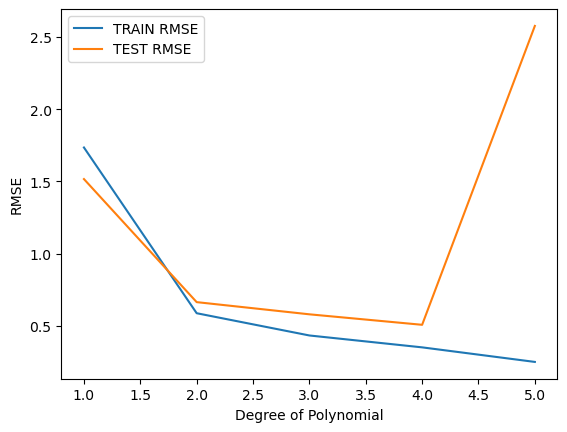

In [34]:
# plot to visualize these errors to determine the degree that matches the model
plt.plot(range(1,6), train_RMSE_errors[:5], label="TRAIN RMSE")
plt.plot(range(1,6), test_RMSE_errors[:5], label="TEST RMSE")
plt.xlabel("Degree of Polynomial")
plt.ylabel("RMSE")
plt.legend()

In [56]:
# selecting degree 3, we create our final model

poly_converter = PolynomialFeatures(degree=3, include_bias=False)
x_poly_feat = poly_converter.fit_transform(X)

model = LinearRegression()
model.fit(x_poly_feat, y)

dump(poly_converter, '3rd Degree Polynomial Converter.joblib')
dump(model, '3rd Degree Polynomial Regression Model.joblib')

['3rd Degree PolynomialRegression Model.joblib']